# Faces recognition example

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)



In [1]:
from time import time

import matplotlib.pyplot as plt
from scipy.stats import loguniform

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Download the data, if not already on disk and load it as numpy arrays



In [56]:
lfw_people = fetch_lfw_people(min_faces_per_person=44, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1701
n_features: 1850
n_classes: 15


Split into a training set and a test and keep 25% of the data for testing.



In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
dataset): unsupervised feature extraction / dimensionality reduction



In [58]:
n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 1275 faces
done in 0.382s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.022s


Train a SVM classification model



In [59]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 14.984s
Best estimator found by grid search:
SVC(C=4253.345483323155, class_weight='balanced', gamma=0.002268414551092329)


Quantitative evaluation of the model quality on the test set



Predicting people's names on the test set
done in 0.115s
                           precision    recall  f1-score   support

             Ariel Sharon       0.94      0.71      0.81        21
             Colin Powell       0.71      0.88      0.78        56
          Donald Rumsfeld       0.80      0.69      0.74        29
            George W Bush       0.83      0.91      0.87       142
        Gerhard Schroeder       0.79      0.70      0.75        27
  Gloria Macapagal Arroyo       1.00      0.79      0.88        14
              Hugo Chavez       0.75      0.75      0.75        12
           Jacques Chirac       0.70      0.70      0.70        10
            Jean Chretien       0.82      0.60      0.69        15
            John Ashcroft       0.70      0.47      0.56        15
        Junichiro Koizumi       0.88      0.47      0.61        15
Luiz Inacio Lula da Silva       0.83      0.56      0.67         9
          Serena Williams       0.71      0.80      0.75        15
    

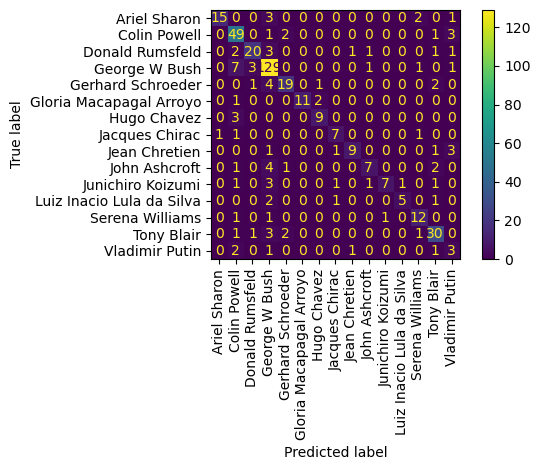

In [60]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

Qualitative evaluation of the predictions using matplotlib



In [63]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot the result of the prediction on a portion of the test set



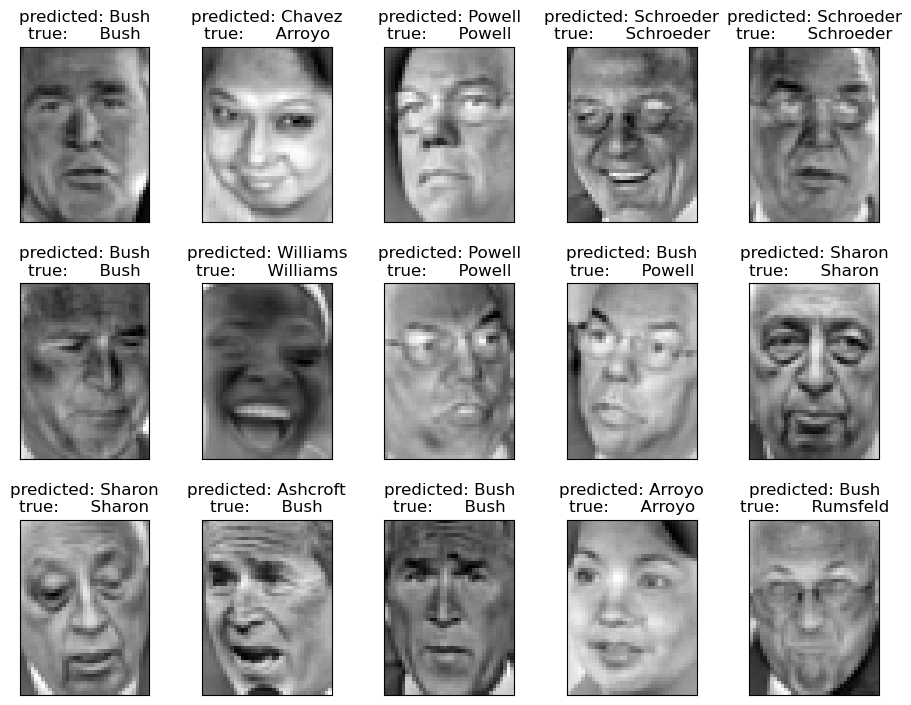

In [64]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

Face recognition problem would be much more effectively solved by training
convolutional neural networks but this family of models is outside of the scope of
the scikit-learn library. Interested readers should instead try to use pytorch or
tensorflow to implement such models.



# Grouping faces

Group face pictures, by spliting into predifined (x) clusters of somehow similar pictures.

In [ ]:
X_train_pca, X_test_pca

In [ ]:
y_train, y_test

In [ ]:
target_names

In [68]:
# Fill here...

In [69]:
# ...